In [ ]:
!pip install diffusers transformers accelerate

In [ ]:
from diffusers import StableDiffusionPipeline, DDPMScheduler
import torch
import cv2

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               variant="fp16", torch_dtype=torch.float16)
pipe.to("cuda")
prompt = "A cat took a fish and running in a market"
scheduler = DDPMScheduler(beta_start=0.00085, beta_end=0.012,
                          beta_schedule="scaled_linear")
image = pipe(
    prompt,
    scheduler=scheduler,
    num_inference_steps=30,
    guidance_scale=7.5,
).images[0]
# image.save("cat.png")
# cv2.imshow(image)
# cv

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

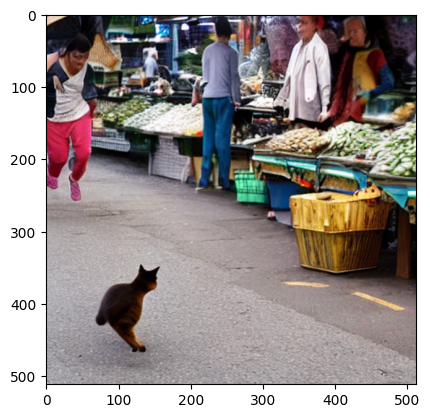

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

imgplot = plt.imshow(image)
plt.show()